<a href="https://colab.research.google.com/github/lauradela/challengesONE_t8_proj1/blob/main/telecomX_challengeONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [ ]:
#com essa linha eu acesso o arquivo json para começar a extrair os dados da API
response = requests.get(url)
if response.status_code == 200:
  #aqui é uma variavel, não tem que ser estruturada
    dados = response.json()
    # aqui é um daraframe que pode ser exportado e tem estrutura de tabela
    df = pd.DataFrame(dados)
    print(df.head())
else:
  print ("Erro na requisição", response.status_code)
  #chamei o arquivo do github

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [ ]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


Normalização dos dados

In [ ]:
# 1. Expandindo as colunas com dicionários,transformando cada coluna(normalizando)
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# 2. Juntando tudo num único DataFrame final# df_final = pd.concat() estou salvando temporariamente , preciso salvar em disco
df_final = pd.concat(
    [df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account],
    axis=1
)


In [ ]:
# Salvando o DataFrame df_final em um arquivo CSV
df_final.to_csv('df_final.csv', index=False)

In [ ]:
# conferindo o resultado:
df_final = pd.read_csv('df_final.csv')
df_final.head()
#como ficou o dataframe df_final depois de expandir os dicionarios

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Limpeza e Tratamento dos Dados

In [ ]:
# se informando sobre o arquivo
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
type(df_final)

pandas.core.frame.DataFrame

In [ ]:
# Charges.Total     7267 non-null   object ,aqui está como object, e ele  é numerico : fazendo a correção:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [ ]:
##revisando as trocas de informações
df_final.info()
# as 2 últimas linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
# removendo dados ausentes
df_final = df_final.dropna(subset=['Churn', 'Charges.Total'])

In [ ]:
# removendo strings vazias
df_final.replace('', np.nan, inplace=True)

In [ ]:
# verificando os valores nulos
df_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
# verificando os valores nulos
df_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
df_final.drop('customerID', axis=1, inplace=True)
# removi a coluna customer id

In [ ]:
# Verifica se há duplicatas em linhas inteiras
duplicadas = df_final.duplicated()

# Conta quantas linhas são duplicadas
num_duplicadas = duplicadas.sum()
print(f"Número de linhas duplicadas: {num_duplicadas}")


Número de linhas duplicadas: 22


In [ ]:
duplicatas = df_final[df_final.duplicated(keep=False)]
print(duplicatas)


     Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
218    Yes  Female              0      No         No       1          Yes   
295    Yes  Female              0      No         No       1          Yes   
473     No    Male              0      No         No       1          Yes   
624    Yes    Male              0      No         No       1          Yes   
685     No  Female              0      No         No       1          Yes   
701    Yes    Male              0      No         No       1          Yes   
745    Yes    Male              0      No         No       1          Yes   
881    Yes    Male              0      No         No       1          Yes   
1341   Yes    Male              0      No         No       1          Yes   
1357   Yes    Male              0      No         No       1          Yes   
1841   Yes  Female              0      No         No       1          Yes   
1851   Yes  Female              1      No         No       1          Yes   

In [ ]:
print(f'Total de duplicatas encontradas: {len(duplicatas)}')


Total de duplicatas encontradas: 42


In [ ]:
grupo_duplicado = duplicatas.groupby(duplicatas.columns.tolist()).size().reset_index(name='Contagem')
print(grupo_duplicado.sort_values(by='Contagem', ascending=False))


   Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
3     No    Male              0      No         No       1          Yes   
4     No    Male              0      No         No       1          Yes   
1     No  Female              0      No         No       1          Yes   
0     No  Female              0      No         No       1          Yes   
2     No  Female              0      No         No       1          Yes   
5     No    Male              0      No         No       1          Yes   
6     No    Male              0      No         No       1          Yes   
7     No    Male              0      No         No       1          Yes   
8    Yes  Female              0      No         No       1          Yes   
9    Yes  Female              0      No         No       1          Yes   
10   Yes  Female              0      No         No       1          Yes   
11   Yes  Female              0      No         No       1          Yes   
12   Yes  Female         

In [ ]:
# Remove as duplicatas mantendo a primeira ocorrência
df_final = df_final.drop_duplicates(keep='first')

# Verifica se ainda há duplicatas
print(f"Total de registros após remoção: {len(df_final)}")
print(f"Duplicatas restantes: {df_final.duplicated().sum()}")


Total de registros após remoção: 7010
Duplicatas restantes: 0


In [ ]:
df_final.to_csv('df_final_sem_duplicatas.csv', index=False)


In [ ]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7010 non-null   object 
 1   gender            7010 non-null   object 
 2   SeniorCitizen     7010 non-null   int64  
 3   Partner           7010 non-null   object 
 4   Dependents        7010 non-null   object 
 5   tenure            7010 non-null   int64  
 6   PhoneService      7010 non-null   object 
 7   MultipleLines     7010 non-null   object 
 8   InternetService   7010 non-null   object 
 9   OnlineSecurity    7010 non-null   object 
 10  OnlineBackup      7010 non-null   object 
 11  DeviceProtection  7010 non-null   object 
 12  TechSupport       7010 non-null   object 
 13  StreamingTV       7010 non-null   object 
 14  StreamingMovies   7010 non-null   object 
 15  Contract          7010 non-null   object 
 16  PaperlessBilling  7010 non-null   object 
 17  

In [ ]:
df_final.reset_index(drop=True, inplace=True)


In [ ]:
# # quantidade de clientes por categoria
print(df_final['Churn'].value_counts(dropna=False))

Churn
No     5153
Yes    1857
Name: count, dtype: int64


In [ ]:

counts = df_final['Churn'].value_counts(dropna=False)
percentages = df_final['Churn'].value_counts(normalize=True).mul(100).round(2)

result = pd.DataFrame({'Quantidade': counts, 'Porcentagem (%)': percentages})
print("Resumo de Churn:\n", result)

Resumo de Churn:
        Quantidade  Porcentagem (%)
Churn                             
No           5153            73.51
Yes          1857            26.49


In [ ]:
# quantidade de cliente em percentagem
print(df_final['Churn'].value_counts(normalize=True))

Churn
No     0.735093
Yes    0.264907
Name: proportion, dtype: float64


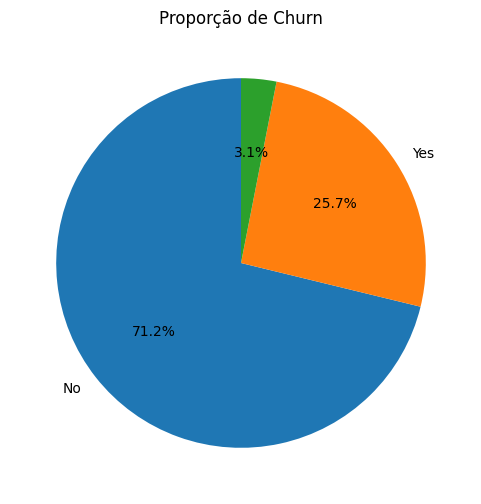

In [ ]:
df_temp = df.copy()
df_temp['Churn'] = df_temp['Churn'].fillna('Desconhecido')

df_temp['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6, 6),
    title='Proporção de Churn'
)
plt.ylabel('')
plt.show()


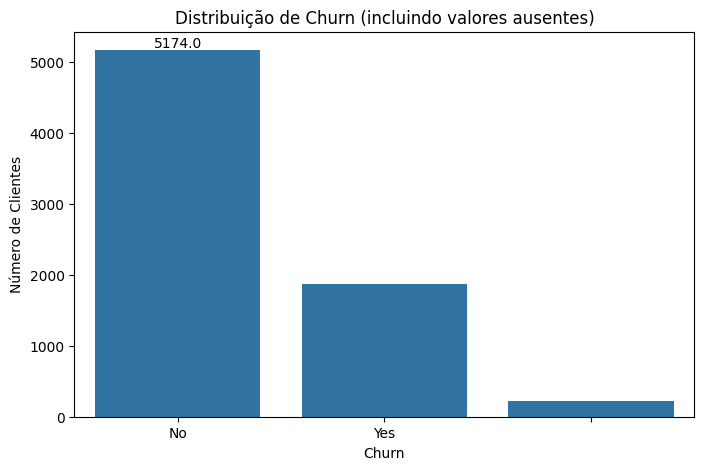

In [ ]:
df_temp = df.copy()
df_temp['Churn'] = df_temp['Churn'].fillna('Desconhecido')

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_temp, x='Churn')
plt.title('Distribuição de Churn (incluindo valores ausentes)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')

# Adiciona os números em cima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')
    plt.show()

In [ ]:
df_temp = df.copy()

In [ ]:
print(df_final['Churn'].unique())


['No' 'Yes']


In [ ]:
print(df_final['Churn'].value_counts())

Churn
No     5153
Yes    1857
Name: count, dtype: int64


5398 clientes permaneceram (não evadiram)

1869 clientes saíram (deram churn)

In [ ]:
total_clientes = len(df_final)
contagem_churn = df_final['Churn'].value_counts()

# Pega valores absolutos
clientes_permaneceram = contagem_churn.get('No', 0)
clientes_churn = contagem_churn.get('Yes', 0)

# Calcula porcentagens
pct_permaneceram = (clientes_permaneceram / total_clientes) * 100
pct_churn = (clientes_churn / total_clientes) * 100

print(f"Do total de {total_clientes} clientes analisados,")
print(f"{clientes_permaneceram} ({pct_permaneceram:.1f}%) permaneceram (não evadiram),")
print(f"enquanto {clientes_churn} ({pct_churn:.1f}%) saíram (deram churn).")


Do total de 7010 clientes analisados,
5153 (73.5%) permaneceram (não evadiram),
enquanto 1857 (26.5%) saíram (deram churn).


In [ ]:
# preciso saber qual o serviço mais procurado
servicos = ['PhoneService', 'MultipleLines', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Dicionário para guardar os resultados
servico_counts = {}

for servico in servicos:
    count_yes = df_final[df_final[servico] == 'Yes'].shape[0]
    servico_counts[servico] = count_yes

    # criei um DataFrame e ordenar (análise/visualização)
df_servicos = pd.DataFrame.from_dict(servico_counts, orient='index', columns=['Quantidade'])
df_servicos = df_servicos.sort_values('Quantidade', ascending=False)
print(df_servicos)

# Transformei em DataFrame e ordenei

                  Quantidade
PhoneService            6330
MultipleLines           2967
StreamingMovies         2731
StreamingTV             2703
OnlineBackup            2425
DeviceProtection        2418
TechSupport             2040
OnlineSecurity          2015


<ipython-input-115-4249985612>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_servicos.index, y='Quantidade', data=df_servicos, palette='viridis')


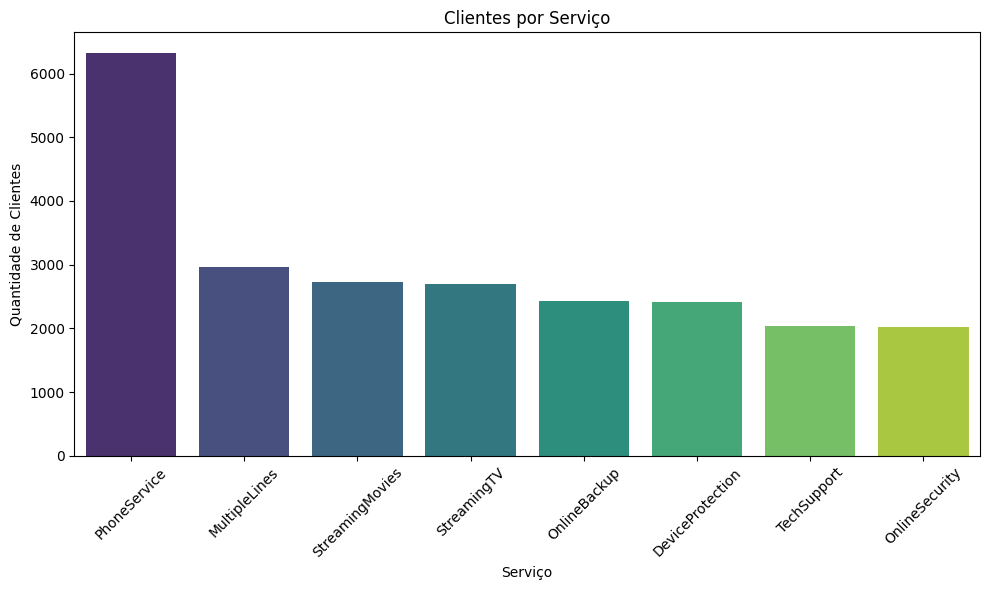

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_servicos.index, y='Quantidade', data=df_servicos, palette='viridis')
plt.xticks(rotation=45)
plt.title('Clientes por Serviço')
plt.xlabel('Serviço')
plt.ylabel('Quantidade de Clientes')
plt.tight_layout()
plt.show()

In [ ]:
 # analizando o tenure
df_final['tenure'].max()

72

In [ ]:
df_final['tenure'].describe()
#pedi uma descrição sobre este periodo

,tenure
count,7010.000000
mean,32.520399
std,24.520441
min,1.000000
25%,9.000000
50%,29.000000
75%,56.000000
max,72.000000


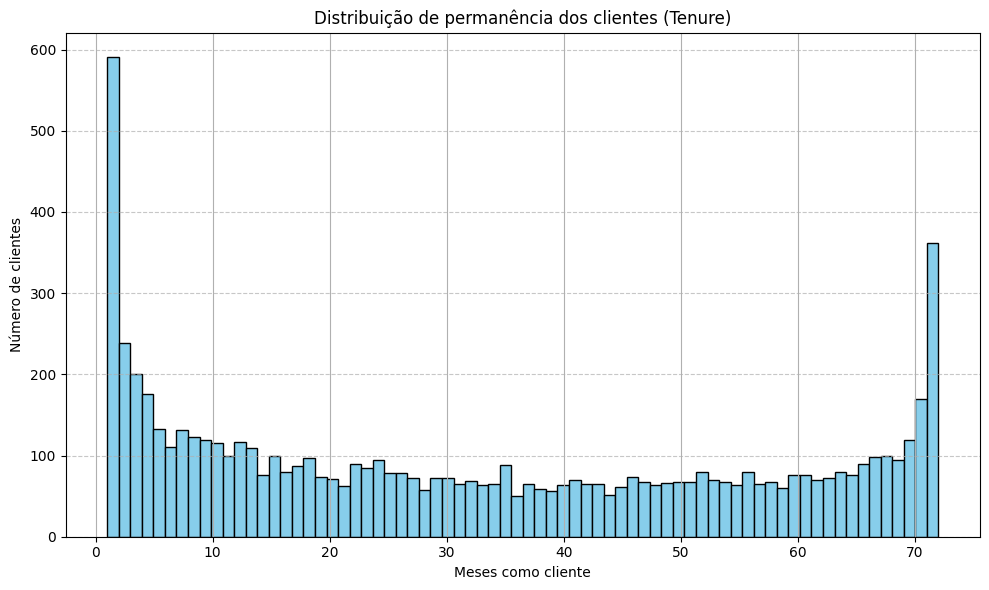

In [ ]:
plt.figure(figsize=(10, 6))
df_final['tenure'].hist(bins=72, color='skyblue', edgecolor='black')
plt.xlabel('Meses como cliente')
plt.ylabel('Número de clientes')
plt.title('Distribuição de permanência dos clientes (Tenure)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


O gráfico acima mostra claramente que a maioria dos cancelamentos ocorre no primeiro mês de uso do serviço. A altura da barra no mês 1 revela um alto índice de evasão imediata, indicando **possíveis falhas na experiência inicial** **do cliente**. Já os meses finais demonstram que apenas uma pequena parcela atinge longos períodos de fidelização, reforçando que a retenção inicial** é um ponto crítico a ser melhorado.**

In [ ]:
print(df_final['tenure'].unique())

[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]


In [ ]:
tenure_zero = df_final[df_final['tenure'] == 0]
print(f"Número de clientes com tenure = 0: {len(tenure_zero)}")

Número de clientes com tenure = 0: 0


In [ ]:
tenure_zero.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [ ]:
tenure_zero = df_final[df_final['tenure'] == 0]
print("Antes da limpeza:")
print(f"Número de clientes com tenure = 0: {len(tenure_zero)}")

# Verifiquei valores faltantes
print("Valores faltantes em 'Churn' para tenure=0:", tenure_zero['Churn'].isnull().sum())
print("Valores faltantes em 'Charges.Total' para tenure=0:", tenure_zero['Charges.Total'].isnull().sum())


Antes da limpeza:
Número de clientes com tenure = 0: 0
Valores faltantes em 'Churn' para tenure=0: 0
Valores faltantes em 'Charges.Total' para tenure=0: 0


In [ ]:
# vendo quem tem ou não servico telefonico
df_final['PhoneService'].describe()

,PhoneService
count,7010
unique,2
top,Yes
freq,6330


In [ ]:
df_final['PhoneService'].value_counts()
df_final['PhoneService'].value_counts(normalize=True)  # porcentagem


,proportion
PhoneService,
Yes,0.902996
No,0.097004


In [ ]:
print(df_final['PhoneService'].value_counts())


PhoneService
Yes    6330
No      680
Name: count, dtype: int64


In [ ]:
print(df_final['PhoneService'].value_counts(normalize=True) * 100)


PhoneService
Yes    90.299572
No      9.700428
Name: proportion, dtype: float64


In [ ]:
# Número total de clientes com PhoneService = 'Yes'
total_phone = df_final[df_final['PhoneService'] == 'Yes'].shape[0]

# Número de clientes com PhoneService = 'Yes' que evadiram (Churn == 'Yes')
evadiram_phone = df_final[(df_final['PhoneService'] == 'Yes') & (df_final['Churn'] == 'Yes')]
num_evadiram = evadiram_phone.shape[0]

# Percentual de evasão entre os que têm PhoneService
percentual_evasao = (num_evadiram / total_phone) * 100

print(f"Número de clientes com PhoneService que evadiram: {num_evadiram}")
print(f"Percentual de evasão entre clientes com PhoneService: {percentual_evasao:.2f}%")


Número de clientes com PhoneService que evadiram: 1687
Percentual de evasão entre clientes com PhoneService: 26.65%


In [ ]:
# Filtrar clientes com PhoneService = 'Yes' e MultipleLines = 'No'
df_phone_only = df_final[(df_final['PhoneService'] == 'Yes') & (df_final['MultipleLines'] == 'No')]

# Quantidade que deram churn
churn_count = df_phone_only[df_phone_only['Churn'] == 'Yes'].shape[0]

# Total de clientes com PhoneService e sem MultipleLines
total = df_phone_only.shape[0]

# Porcentagem de churn nesse grupo
churn_percent = (churn_count / total) * 100

print(f"Número de clientes com PhoneService e sem MultipleLines que evadiram: {churn_count}")
print(f"Percentual de evasão nesse grupo: {churn_percent:.2f}%")


Número de clientes com PhoneService e sem MultipleLines que evadiram: 837
Percentual de evasão nesse grupo: 24.89%


In [ ]:
print(df_final['MultipleLines'].describe())

count     7010
unique       3
top         No
freq      3363
Name: MultipleLines, dtype: object


In [ ]:
# Filtrar apenas clientes com PhoneService (para análise de MultipleLines)
df_multilines_valid = df_final[df_final['PhoneService'] == 'Yes']


In [ ]:
print(df_multilines_valid['MultipleLines'].value_counts())
print(df_multilines_valid['MultipleLines'].value_counts(normalize=True) * 100)


MultipleLines
No     3363
Yes    2967
Name: count, dtype: int64
MultipleLines
No     53.127962
Yes    46.872038
Name: proportion, dtype: float64


In [ ]:
df_final['InternetService'].describe()



,InternetService
count,7010
unique,3
top,Fiber optic
freq,3090


In [ ]:
# esse codigo é para filtrar os clientes que tem serviço de internet
# sem mais nenhum serviço opcional
#Lista dos serviços adicionais que queremos garantir que o cliente NÃO tenha
servicos_adicionais = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Filtrar clientes que têm internet (qualquer tipo diferente de 'No')
clientes_internet = df_final[df_final['InternetService'] != 'No']

# Agora, filtrar clientes que NÃO têm nenhum serviço adicional (todos os serviços = 'No')
clientes_somente_internet = clientes_internet[
    (clientes_internet[servicos_adicionais] == 'No').all(axis=1)
]

print(f"Número de clientes com somente Internet e sem serviços adicionais: {clientes_somente_internet.shape[0]}")
print(clientes_somente_internet.head())


Número de clientes com somente Internet e sem serviços adicionais: 685
   Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
12    No  Female              0     Yes         No       5          Yes   
17    No  Female              1      No         No       1          Yes   
19   Yes    Male              1      No         No       1           No   
39    No    Male              0     Yes        Yes      27          Yes   
48    No    Male              0      No         No       1          Yes   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
12                No     Fiber optic             No           No   
17               Yes     Fiber optic             No           No   
19  No phone service             DSL             No           No   
39               Yes     Fiber optic             No           No   
48                No             DSL             No           No   

   DeviceProtection TechSupport StreamingTV StreamingMovies        Co

In [ ]:
# Lista dos serviços adicionais
servicos_adicionais = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies']

# Filtrar clientes que têm internet (diferente de 'No')
clientes_internet = df_final[df_final['InternetService'] != 'No']

# Aplicar o filtro diretamente em clientes_internet
clientes_somente_internet = clientes_internet[
    (clientes_internet[servicos_adicionais] == 'No').all(axis=1)
]

print(f"Número de clientes com somente Internet e sem serviços adicionais: {clientes_somente_internet.shape[0]}")
print(clientes_somente_internet.head())


Número de clientes com somente Internet e sem serviços adicionais: 685
   Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
12    No  Female              0     Yes         No       5          Yes   
17    No  Female              1      No         No       1          Yes   
19   Yes    Male              1      No         No       1           No   
39    No    Male              0     Yes        Yes      27          Yes   
48    No    Male              0      No         No       1          Yes   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
12                No     Fiber optic             No           No   
17               Yes     Fiber optic             No           No   
19  No phone service             DSL             No           No   
39               Yes     Fiber optic             No           No   
48                No             DSL             No           No   

   DeviceProtection TechSupport StreamingTV StreamingMovies        Co

In [ ]:
# percentual de clientes somente com internet sem nenhum adicional
servicos_adicionais = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies']

# Clientes com qualquer tipo de Internet (exclui 'No')
clientes_internet = df_final[df_final['InternetService'] != 'No']

# Clientes que não usam nenhum serviço adicional
clientes_somente_internet = clientes_internet[
    (clientes_internet[servicos_adicionais] == 'No').all(axis=1)
]

# Porcentagem
percent_somente_internet = (clientes_somente_internet.shape[0] / clientes_internet.shape[0]) * 100

print(f"Número de clientes com somente Internet: {clientes_somente_internet.shape[0]}")
print(f"Total de clientes com Internet: {clientes_internet.shape[0]}")
print(f"Percentual de clientes com somente Internet: {percent_somente_internet:.2f}%")


Número de clientes com somente Internet: 685
Total de clientes com Internet: 5504
Percentual de clientes com somente Internet: 12.45%


In [ ]:
# Lista de serviços adicionais
servicos_adicionais = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Filtrar clientes que têm algum serviço de Internet
clientes_internet = df_final[df_final['InternetService'] != 'No']

# Filtrar apenas quem não possui nenhum dos serviços adicionais
clientes_somente_internet = clientes_internet[
    (clientes_internet[servicos_adicionais] == 'No').all(axis=1)
]

# Verificar quantos desses deram churn
clientes_internet_churn = clientes_somente_internet[clientes_somente_internet['Churn'] == 'Yes']

# Número e percentual
numero_churn = clientes_internet_churn.shape[0]
total_somente_internet = clientes_somente_internet.shape[0]
percentual_churn = (numero_churn / total_somente_internet) * 100

print(f"Número de clientes com somente Internet que evadiram: {numero_churn}")
print(f"Percentual de evasão nesse grupo: {percentual_churn:.2f}%")


Número de clientes com somente Internet que evadiram: 354
Percentual de evasão nesse grupo: 51.68%


In [ ]:
# Lista de serviços adicionais de internet
servicos_adicionais = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies']

# Contar quantos clientes têm cada serviço (valor == 'Yes')
servico_uso = {}
for servico in servicos_adicionais:
    count = df_final[df_final[servico] == 'Yes'].shape[0]
    servico_uso[servico] = count

# Transformar em DataFrame para visualização
df_uso_servicos = pd.DataFrame.from_dict(servico_uso, orient='index', columns=['Quantidade'])
df_uso_servicos = df_uso_servicos.sort_values('Quantidade', ascending=False)

# Exibir resultado
print(df_uso_servicos)


                  Quantidade
StreamingMovies         2731
StreamingTV             2703
OnlineBackup            2425
DeviceProtection        2418
TechSupport             2040
OnlineSecurity          2015


In [ ]:
servicos_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies']

# Criar dicionário com a taxa de churn por serviço
churn_por_servico = {}

for servico in servicos_internet:
    total = df_final[df_final[servico] == 'Yes'].shape[0]
    churn = df_final[(df_final[servico] == 'Yes') & (df_final['Churn'] == 'Yes')].shape[0]
    taxa = (churn / total) * 100 if total > 0 else 0
    churn_por_servico[servico] = round(taxa, 2)

# Transformar em DataFrame
df_churn_servicos = pd.DataFrame.from_dict(churn_por_servico, orient='index', columns=['% Evasão'])
df_churn_servicos = df_churn_servicos.sort_values(by='% Evasão', ascending=False)

print(df_churn_servicos)


                  % Evasão
StreamingTV          30.11
StreamingMovies      29.95
DeviceProtection     22.54
OnlineBackup         21.57
TechSupport          15.20
OnlineSecurity       14.64


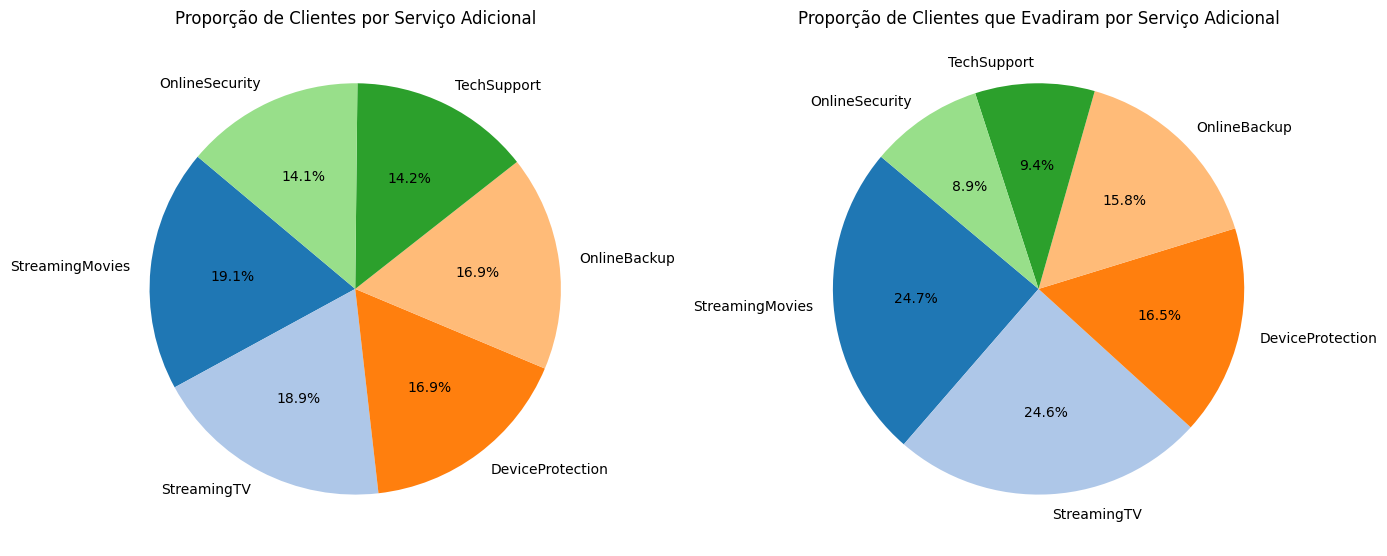

In [ ]:
# Dados de procura (quantidade de clientes)
servicos = ['StreamingMovies', 'StreamingTV', 'DeviceProtection', 'OnlineBackup', 'TechSupport', 'OnlineSecurity']
quantidade = [2731, 2703, 2418, 2425, 2040, 2015]

# Dados de evasão (em número absoluto, calculado pela taxa de evasão * quantidade / 100)
evasao_percentual = [29.95, 30.11, 22.54, 21.57, 15.20, 14.64]
evasao_numeros = [int(q * p / 100) for q, p in zip(quantidade, evasao_percentual)]

# Cores para os gráficos
colors = plt.cm.tab20.colors

fig, axs = plt.subplots(1, 2, figsize=(14,7))

# Pizza da procura
axs[0].pie(quantidade, labels=servicos, autopct='%1.1f%%', startangle=140, colors=colors)
axs[0].set_title('Proporção de Clientes por Serviço Adicional')

# Pizza da evasão
axs[1].pie(evasao_numeros, labels=servicos, autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title('Proporção de Clientes que Evadiram por Serviço Adicional')

plt.tight_layout()
plt.show()


In [ ]:
# Filtrar clientes que têm internet (excluindo 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Crosstab de InternetService x Churn, com percentual dentro de cada tipo de internet (DSL e Fiber optic)
internet_churn = pd.crosstab(df_internet['InternetService'], df_internet['Churn'], normalize='index') * 100

print(internet_churn)

# Mostrar só a taxa de evasão (coluna 'Yes')
evasao_por_internet = internet_churn['Yes']
print("\nPercentual de evasão por tipo de Internet (clientes com internet):")
print(evasao_por_internet)


Churn                   No        Yes
InternetService                      
DSL              81.068766  18.931234
Fiber optic      58.220065  41.779935

Percentual de evasão por tipo de Internet (clientes com internet):
InternetService
DSL            18.931234
Fiber optic    41.779935
Name: Yes, dtype: float64


In [ ]:
df_final['OnlineSecurity'].describe()

,OnlineSecurity
count,7010
unique,3
top,No
freq,3489


In [ ]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de OnlineSecurity só para clientes com internet
print("Valores únicos de OnlineSecurity para clientes com internet:")
print(df_internet['OnlineSecurity'].unique())

# Mostrar contagem de cada valor em OnlineSecurity, para clientes com internet
print("\nContagem de OnlineSecurity entre clientes com internet:")
print(df_internet['OnlineSecurity'].value_counts())




Valores únicos de OnlineSecurity para clientes com internet:
['No' 'Yes']

Contagem de OnlineSecurity entre clientes com internet:
OnlineSecurity
No     3489
Yes    2015
Name: count, dtype: int64


In [ ]:
#calcular taxa de churn para clientes com e sem OnlineSecurity
churn_por_security = pd.crosstab(df_internet['OnlineSecurity'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por OnlineSecurity (clientes com internet):")
print(churn_por_security)


Percentual de churn por OnlineSecurity (clientes com internet):
Churn                  No        Yes
OnlineSecurity                      
No              58.354829  41.645171
Yes             85.359801  14.640199


In [ ]:
df_final['OnlineSecurity'].describe()

,OnlineSecurity
count,7010
unique,3
top,No
freq,3489


In [ ]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de DeviceProtection para clientes com internet
print("Valores únicos de DeviceProtection para clientes com internet:")
print(df_internet['DeviceProtection'].unique())

# Mostrar contagem de cada valor em DeviceProtection para clientes com internet
print("\nContagem de DeviceProtection entre clientes com internet:")
print(df_internet['DeviceProtection'].value_counts())

# Calcular percentual de churn por DeviceProtection (para clientes com internet)
churn_por_device = pd.crosstab(df_internet['DeviceProtection'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por DeviceProtection (clientes com internet):")
print(churn_por_device)


Valores únicos de DeviceProtection para clientes com internet:
['No' 'Yes']

Contagem de DeviceProtection entre clientes com internet:
DeviceProtection
No     3086
Yes    2418
Name: count, dtype: int64

Percentual de churn por DeviceProtection (clientes com internet):
Churn                    No        Yes
DeviceProtection                      
No                61.017498  38.982502
Yes               77.460711  22.539289


In [ ]:
df_final['OnlineBackup'].describe()

,OnlineBackup
count,7010
unique,3
top,No
freq,3079


In [ ]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de OnlineBackup para clientes com internet
print("Valores únicos de OnlineBackup para clientes com internet:")
print(df_internet['OnlineBackup'].unique())

# Mostrar contagem de cada valor em OnlineBackup para clientes com internet
print("\nContagem de OnlineBackup entre clientes com internet:")
print(df_internet['OnlineBackup'].value_counts())

# Calcular percentual de churn por OnlineBackup (para clientes com internet)
churn_por_onlinebackup = pd.crosstab(df_internet['OnlineBackup'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por OnlineBackup (clientes com internet):")
print(churn_por_onlinebackup)


Valores únicos de OnlineBackup para clientes com internet:
['Yes' 'No']

Contagem de OnlineBackup entre clientes com internet:
OnlineBackup
No     3079
Yes    2425
Name: count, dtype: int64

Percentual de churn por OnlineBackup (clientes com internet):
Churn                No        Yes
OnlineBackup                      
No            60.214355  39.785645
Yes           78.432990  21.567010


In [ ]:
# verificando se Techsupport funciona para PhoneService
# Mostrar valores únicos das duas colunas para ver possíveis combinações
print(df_final[['PhoneService', 'TechSupport']].drop_duplicates())

# Contar quantos clientes têm cada combinação de PhoneService e TechSupport
contagem = df_final.groupby(['PhoneService', 'TechSupport']).size()
print(contagem)


   PhoneService          TechSupport
0           Yes                  Yes
1           Yes                   No
10           No                  Yes
19           No                   No
20          Yes  No internet service
PhoneService  TechSupport        
No            No                      393
              Yes                     287
Yes           No                     3071
              No internet service    1506
              Yes                    1753
dtype: int64


In [ ]:
df_final['TechSupport'].describe()

,TechSupport
count,7010
unique,3
top,No
freq,3464


In [ ]:
df_final['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de TechSupport para clientes com internet
print("Valores únicos de TechSupport para clientes com internet:")
print(df_internet['TechSupport'].unique())

# Mostrar contagem de cada valor em TechSupport para clientes com internet
print("\nContagem de TechSupport entre clientes com internet:")
print(df_internet['TechSupport'].value_counts())

# Calcular percentual de churn por TechSupport (para clientes com internet)
churn_por_techsupport = pd.crosstab(df_internet['TechSupport'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por TechSupport (clientes com internet):")
print(churn_por_techsupport)


Valores únicos de TechSupport para clientes com internet:
['Yes' 'No']

Contagem de TechSupport entre clientes com internet:
TechSupport
No     3464
Yes    2040
Name: count, dtype: int64

Percentual de churn por TechSupport (clientes com internet):
Churn               No        Yes
TechSupport                      
No           58.487298  41.512702
Yes          84.803922  15.196078


In [ ]:
df_final['DeviceProtection'].describe()

,DeviceProtection
count,7010
unique,3
top,No
freq,3086


In [ ]:
df_final['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de DeviceProtection para clientes com internet
print("Valores únicos de DeviceProtection para clientes com internet:")
print(df_internet['DeviceProtection'].unique())

# Mostrar contagem de cada valor em DeviceProtection para clientes com internet
print("\nContagem de DeviceProtection entre clientes com internet:")
print(df_internet['DeviceProtection'].value_counts())

# Calcular percentual de churn por DeviceProtection (para clientes com internet)
churn_por_deviceprotection = pd.crosstab(df_internet['DeviceProtection'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por DeviceProtection (clientes com internet):")
print(churn_por_deviceprotection)

Valores únicos de DeviceProtection para clientes com internet:
['No' 'Yes']

Contagem de DeviceProtection entre clientes com internet:
DeviceProtection
No     3086
Yes    2418
Name: count, dtype: int64

Percentual de churn por DeviceProtection (clientes com internet):
Churn                    No        Yes
DeviceProtection                      
No                61.017498  38.982502
Yes               77.460711  22.539289


In [ ]:
df_final['StreamingTV'].describe()

,StreamingTV
count,7010
unique,3
top,No
freq,2801


In [ ]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de StreamingTV para clientes com internet
print("Valores únicos de StreamingTV para clientes com internet:")
print(df_internet['StreamingTV'].unique())

# Mostrar contagem de cada valor em StreamingTV para clientes com internet
print("\nContagem de StreamingTV entre clientes com internet:")
print(df_internet['StreamingTV'].value_counts())

# Calcular percentual de churn por StreamingTV (para clientes com internet)
churn_por_streamingtv = pd.crosstab(df_internet['StreamingTV'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por StreamingTV (clientes com internet):")
print(churn_por_streamingtv)


Valores únicos de StreamingTV para clientes com internet:
['Yes' 'No']

Contagem de StreamingTV entre clientes com internet:
StreamingTV
No     2801
Yes    2703
Name: count, dtype: int64

Percentual de churn por StreamingTV (clientes com internet):
Churn               No        Yes
StreamingTV                      
No           66.654766  33.345234
Yes          69.885313  30.114687


In [ ]:
df_final['StreamingMovies'].describe()

,StreamingMovies
count,7010
unique,3
top,No
freq,2773


In [ ]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de StreamingMovies para clientes com internet
print("Valores únicos de StreamingMovies para clientes com internet:")
print(df_internet['StreamingMovies'].unique())

# Mostrar contagem de cada valor em StreamingMovies para clientes com internet
print("\nContagem de StreamingMovies entre clientes com internet:")
print(df_internet['StreamingMovies'].value_counts())

# Calcular percentual de churn por StreamingMovies (para clientes com internet)
churn_por_streamingmovies = pd.crosstab(df_internet['StreamingMovies'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por StreamingMovies (clientes com internet):")
print(churn_por_streamingmovies)


Valores únicos de StreamingMovies para clientes com internet:
['No' 'Yes']

Contagem de StreamingMovies entre clientes com internet:
StreamingMovies
No     2773
Yes    2731
Name: count, dtype: int64

Percentual de churn por StreamingMovies (clientes com internet):
Churn                   No        Yes
StreamingMovies                      
No               66.462315  33.537685
Yes              70.047602  29.952398


In [ ]:
df_final['Contract'].describe()

,Contract
count,7010
unique,3
top,Month-to-month
freq,3853


In [ ]:
df_final['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [ ]:
print(df_final['Contract'].value_counts())
print(df_final['Contract'].value_counts(normalize=True) * 100)


Contract
Month-to-month    3853
Two year          1685
One year          1472
Name: count, dtype: int64
Contract
Month-to-month    54.964337
Two year          24.037090
One year          20.998573
Name: proportion, dtype: float64


In [ ]:
df_final['Contract'].value_counts()
df_final['Contract'].value_counts(normalize=True) * 100
 # porcentagem

,proportion
Contract,
Month-to-month,54.964337
Two year,24.037090
One year,20.998573


In [ ]:
pd.crosstab(df_final['Contract'], df_final['Churn'])


Churn,No,Yes
Contract,,
Month-to-month,2210,1643
One year,1306,166
Two year,1637,48


In [ ]:
pd.crosstab(df_final['Contract'], df_final['Churn'], normalize='index') * 100


Churn,No,Yes
Contract,,
Month-to-month,57.357903,42.642097
One year,88.722826,11.277174
Two year,97.151335,2.848665


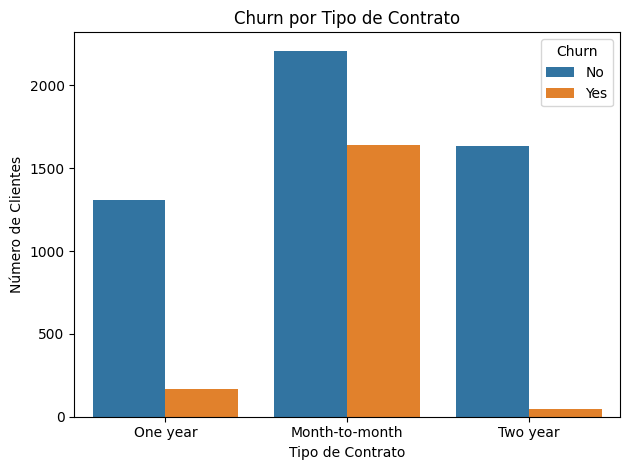

In [ ]:


sns.countplot(data=df_final, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


In [ ]:
df_final['SeniorCitizen'].describe()

,SeniorCitizen
count,7010.000000
mean,0.162767
std,0.369180
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
print(df_final['SeniorCitizen'].value_counts())
print(df_final['SeniorCitizen'].value_counts(normalize=True) * 100)


SeniorCitizen
0    5869
1    1141
Name: count, dtype: int64
SeniorCitizen
0    83.723252
1    16.276748
Name: proportion, dtype: float64


In [ ]:
print(pd.crosstab(df_final['SeniorCitizen'], df_final['Churn']))


Churn            No   Yes
SeniorCitizen            
0              4487  1382
1               666   475


In [ ]:
print(pd.crosstab(df_final['SeniorCitizen'], df_final['Churn'], normalize='index') * 100)


Churn                 No        Yes
SeniorCitizen                      
0              76.452547  23.547453
1              58.369851  41.630149


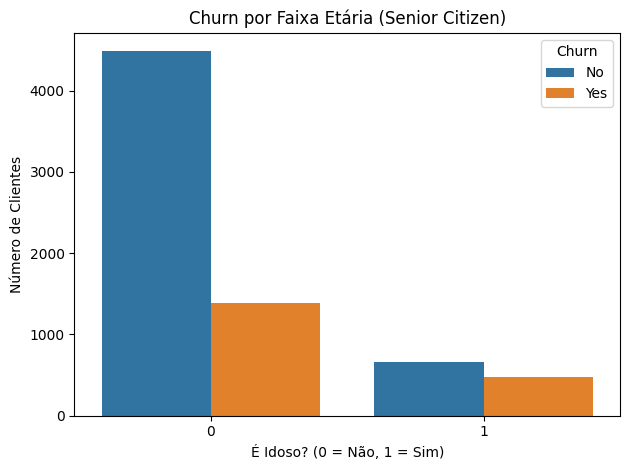

In [ ]:

sns.countplot(data=df_final, x='SeniorCitizen' , hue='Churn')
plt.title('Churn por Faixa Etária (Senior Citizen)')
plt.xlabel ('É Idoso? (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

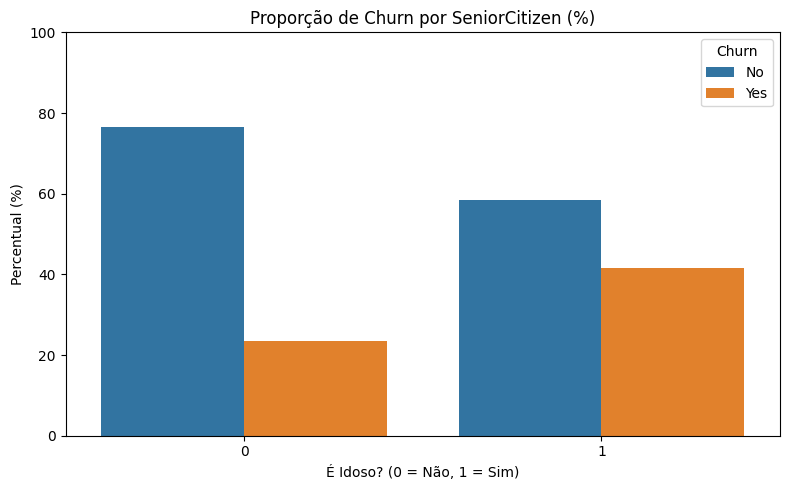

In [ ]:


# Criar uma tabela com a proporção de churn por grupo SeniorCitizen
prop_churn = pd.crosstab(df_final['SeniorCitizen'], df_final['Churn'], normalize='index') * 100
prop_churn = prop_churn.reset_index()

# Deixar o gráfico no formato "long" para o seaborn
prop_churn_melt = prop_churn.melt(id_vars='SeniorCitizen', var_name='Churn', value_name='Percentual')

# Plotar
plt.figure(figsize=(8,5))
sns.barplot(data=prop_churn_melt, x='SeniorCitizen', y='Percentual', hue='Churn')

plt.title('Proporção de Churn por SeniorCitizen (%)')
plt.xlabel('É Idoso? (0 = Não, 1 = Sim)')
plt.ylabel('Percentual (%)')
plt.ylim(0, 100)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


In [ ]:
df_final['gender'].describe()

,gender
count,7010
unique,2
top,Male
freq,3535


In [ ]:
df_final['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
print(df_final['gender'].value_counts())
print(df_final['gender'].value_counts(normalize=True) * 100)

gender
Male      3535
Female    3475
Name: count, dtype: int64
gender
Male      50.42796
Female    49.57204
Name: proportion, dtype: float64


In [ ]:
print(pd.crosstab(df_final['gender'], df_final['Churn']))

Churn     No  Yes
gender           
Female  2541  934
Male    2612  923


In [ ]:
print(pd.crosstab(df_final['gender'], df_final['Churn'], normalize='index') * 100)


Churn          No        Yes
gender                      
Female  73.122302  26.877698
Male    73.889675  26.110325


In [ ]:
df_final['Partner']. describe()

,Partner
count,7010
unique,2
top,No
freq,3617


In [ ]:
df_final['Partner']. unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Tabela de contingência: Partner vs Churn
tabela_cruzada = pd.crosstab(df_final['Partner'], df_final['Churn'])
print(tabela_cruzada)


Churn      No   Yes
Partner            
No       2429  1188
Yes      2724   669


In [ ]:
df_final['Dependents']. describe()

,Dependents
count,7010
unique,2
top,No
freq,4911


In [ ]:
df_final['Dependents']. unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Tabela de contagem absoluta
pd.crosstab(df_final['Dependents'], df_final['Churn'])


Churn,No,Yes
Dependents,,
No,3380,1531
Yes,1773,326


In [ ]:
# Tabela percentual (proporção dentro de cada grupo)
pd.crosstab(df_final['Dependents'], df_final['Churn'], normalize='index') * 100


Churn,No,Yes
Dependents,,
No,68.825087,31.174913
Yes,84.468795,15.531205


In [ ]:
df_final['PaymentMethod'].describe()

,PaymentMethod
count,7010
unique,4
top,Electronic check
freq,2359


In [ ]:
print(df_final['PaymentMethod'].unique())

['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [ ]:
pd.crosstab(df_final['PaymentMethod'], df_final['Churn'], normalize='index') * 100


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.853752,45.146248
Mailed check,80.982368,19.017632


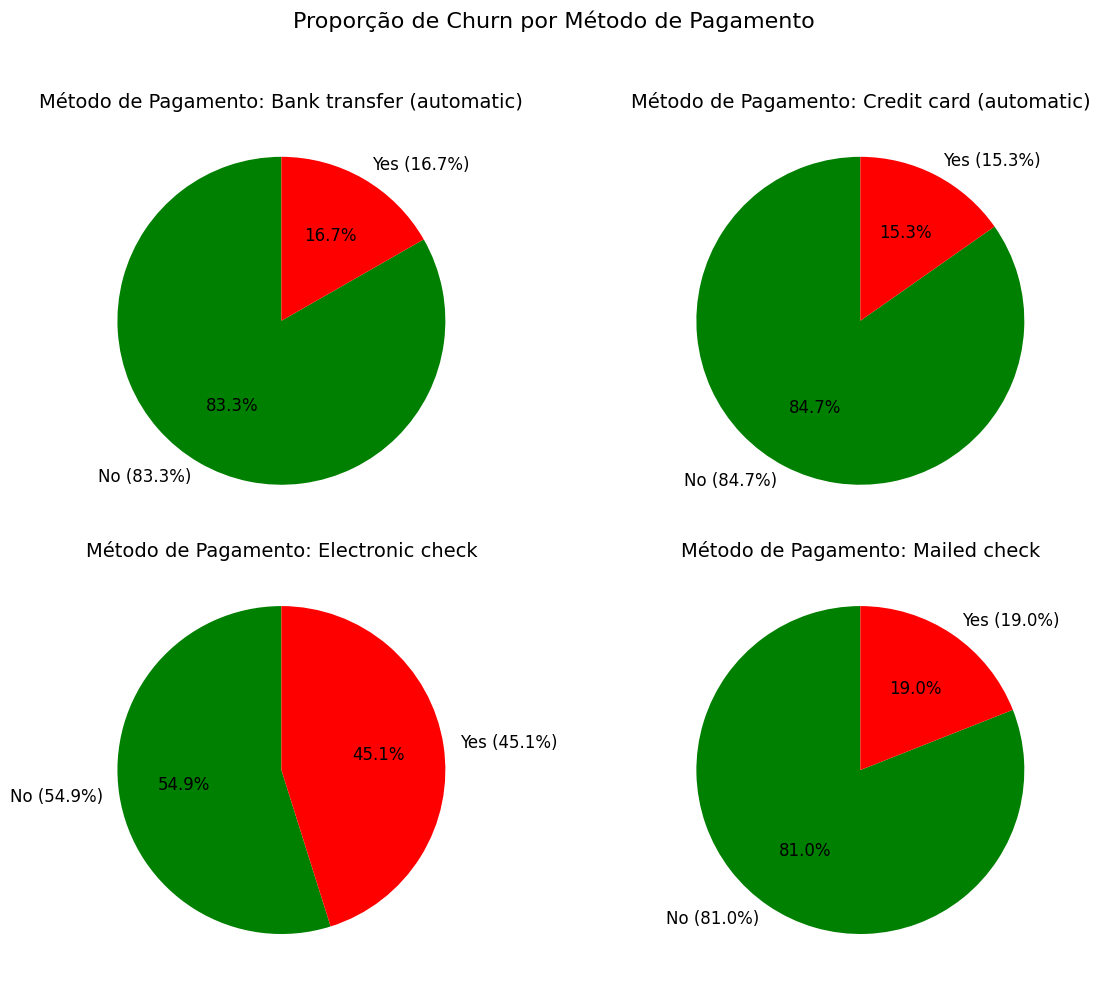

In [ ]:
# Proporção de churn por método de pagamento (em %)
churn_by_payment = pd.crosstab(df_final['PaymentMethod'], df_final['Churn'], normalize='index') * 100

# Configurar o layout para 2x2 pizzas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, payment_method in enumerate(churn_by_payment.index):
    data = churn_by_payment.loc[payment_method]
    axes[i].pie(
        data,
        labels=[f'{churn} ({data[churn]:.1f}%)' for churn in data.index],
        autopct='%1.1f%%',
        colors=['green', 'red'],
        startangle=90,
        textprops={'fontsize': 12}
    )
    axes[i].set_title(f'Método de Pagamento: {payment_method}', fontsize=14)

plt.suptitle('Proporção de Churn por Método de Pagamento', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
df_final['PaperlessBilling'].describe()

,PaperlessBilling
count,7010
unique,2
top,Yes
freq,4158


In [ ]:
print(df_final['PaperlessBilling'].unique())

['Yes' 'No']


In [ ]:
df_final['PaperlessBilling'].value_counts()


,count
PaperlessBilling,
Yes,4158
No,2852


In [ ]:
pd.crosstab(df_final['PaperlessBilling'], df_final['Churn'], normalize='index') * 100


Churn,No,Yes
PaperlessBilling,,
No,83.660589,16.339411
Yes,66.546417,33.453583


In [ ]:
df_final['Charges.Monthly'].describe()

,Charges.Monthly
count,7010.000000
mean,64.888666
std,30.064769
min,18.250000
25%,35.750000
50%,70.400000
75%,89.900000
max,118.750000


In [ ]:
df_final['Charges.Monthly'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [ ]:
# Criar as faixas de valor mensal
bins = [0, 40, 80, df_final['Charges.Monthly'].max()]
labels = ['Baixo', 'Médio', 'Alto']
df_final['Charge_Faixa'] = pd.cut(df_final['Charges.Monthly'], bins=bins, labels=labels)

# Ver a distribuição nas faixas
print(df_final['Charge_Faixa'].value_counts())

# Calcular taxa de churn por faixa
churn_por_faixa = pd.crosstab(df_final['Charge_Faixa'], df_final['Churn'], normalize='index') * 100
print(churn_por_faixa)



Charge_Faixa
Alto     2665
Médio    2527
Baixo    1818
Name: count, dtype: int64
Churn                No        Yes
Charge_Faixa                      
Baixo         88.448845  11.551155
Médio         70.676692  29.323308
Alto          66.003752  33.996248


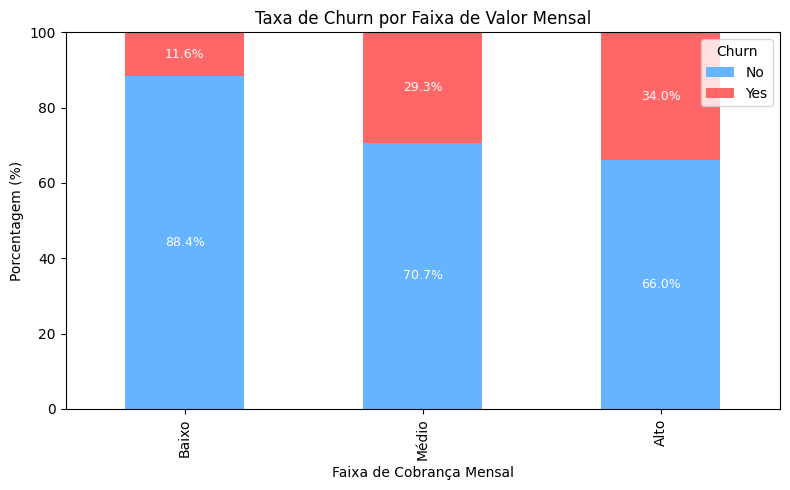

In [ ]:
churn_por_faixa.plot(kind='bar', stacked=True, figsize=(8,5), color=['#66b3ff', '#ff6666'])

for idx, faixa in enumerate(churn_por_faixa.index):
    y_offset = 0
    for churn_status in ['No', 'Yes']:
        pct = churn_por_faixa.loc[faixa, churn_status]
        plt.text(idx, y_offset + pct/2, f'{pct:.1f}%', ha='center', va='center', color='white', fontsize=9)
        y_offset += pct

plt.title('Taxa de Churn por Faixa de Valor Mensal')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Faixa de Cobrança Mensal')
plt.legend(title='Churn')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [ ]:
print(df_final.columns)


Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Charge_Faixa'],
      dtype='object')


In [ ]:
# Criar a nova coluna com o valor médio diário
df_final['Contas_Diarias'] = df_final['Charges.Monthly'] / 30

# (Opcional) Arredondar para 2 casas decimais
df_final['Contas_Diarias'] = df_final['Contas_Diarias'].round(2)

# Verificar se foi criada corretamente
print(df_final[['Charges.Monthly', 'Contas_Diarias']].head())


   Charges.Monthly  Contas_Diarias
0             65.6            2.19
1             59.9            2.00
2             73.9            2.46
3             98.0            3.27
4             83.9            2.80


In [ ]:
# gasto diario
df_final['Faixa_Diaria'] = pd.cut(df_final['Contas_Diarias'],
                                  bins=[0, 2, 3, df_final['Contas_Diarias'].max()],
                                  labels=['Baixo', 'Médio', 'Alto'])


In [ ]:
# taxa de evasão  por faixa diaria
churn_por_diaria = pd.crosstab(df_final['Faixa_Diaria'], df_final['Churn'], normalize='index') * 100
print(churn_por_diaria)


Churn                No        Yes
Faixa_Diaria                      
Baixo         83.166954  16.833046
Médio         66.303437  33.696563
Alto          67.190227  32.809773


In [ ]:
print(df_final.describe())


       SeniorCitizen       tenure  Charges.Monthly  Charges.Total  \
count    7010.000000  7010.000000      7010.000000    7010.000000   
mean        0.162767    32.520399        64.888666    2290.353388   
std         0.369180    24.520441        30.064769    2266.820832   
min         0.000000     1.000000        18.250000      18.800000   
25%         0.000000     9.000000        35.750000     408.312500   
50%         0.000000    29.000000        70.400000    1403.875000   
75%         0.000000    56.000000        89.900000    3807.837500   
max         1.000000    72.000000       118.750000    8684.800000   

       Contas_Diarias  
count     7010.000000  
mean         2.162907  
std          1.002245  
min          0.610000  
25%          1.190000  
50%          2.350000  
75%          3.000000  
max          3.960000  


In [ ]:
df_final.describe(include='all')


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charge_Faixa,Contas_Diarias,Faixa_Diaria
count,7010,7010,7010.000000,7010,7010,7010.000000,7010,7010,7010,7010,...,7010,7010,7010,7010,7010,7010.000000,7010.000000,7010,7010.000000,7010
unique,2,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,2,4,NaN,NaN,3,NaN,3
top,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,Alto,NaN,Baixo
freq,5153,3535,NaN,3617,4911,NaN,6330,3363,3090,3489,...,2801,2773,3853,4158,2359,NaN,NaN,2665,NaN,2905
mean,NaN,NaN,0.162767,NaN,NaN,32.520399,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,64.888666,2290.353388,NaN,2.162907,NaN
std,NaN,NaN,0.369180,NaN,NaN,24.520441,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.064769,2266.820832,NaN,1.002245,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN,0.610000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.750000,408.312500,NaN,1.190000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,70.400000,1403.875000,NaN,2.350000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.900000,3807.837500,NaN,3.000000,NaN


In [ ]:
# Mediana da coluna 'Charges.Monthly'
mediana = df_final['Charges.Monthly'].median()

# Moda da coluna 'gender'
moda_gender = df_final['gender'].mode()[0]

# Desvio padrão de tenure
desvio_tenure = df_final['tenure'].std()


Análise das colunas numéricas
SeniorCitizen
A maioria dos clientes (cerca de 84%) não é idosa (valor 0), enquanto cerca de 16% são idosos (valor 1).

tenure (tempo como cliente em meses)
O tempo médio é de cerca de 32,5 meses, com mediana de 29 meses. Isso indica que a metade dos clientes está com a empresa há menos de 29 meses. O tempo varia bastante, indo de 1 mês até 72 meses.

Charges.Monthly (carga mensal)
A média é de aproximadamente R$64,89, com valores que vão desde R$18,25 até R$118,75. O desvio padrão é relativamente alto (30), o que indica variação considerável nas mensalidades pagas.

Charges.Total (carga total paga pelo cliente)
A média é R$2290, mas o valor varia muito — de R$18,80 até quase R$8700. Isso sugere que alguns clientes estão há muito tempo, enquanto outros são recentes.

Contas_Diarias (média de gasto diário, suponho)
A média é 2,16, com desvio padrão 1,00, mostrando que a maioria dos clientes gasta entre aproximadamente 1,19 (25%) e 3,00 (75%) por dia.

